# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
 pima_df = pd.read_csv("diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pima_df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
pima_df.info()
pima_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [5]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
pima_df[cols] = pima_df[cols].replace({0:np.nan})
pima_df[cols]

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148.0           72.0           35.0      NaN  33.6   
1       85.0           66.0           29.0      NaN  26.6   
2      183.0           64.0            NaN      NaN  23.3   
3       89.0           66.0           23.0     94.0  28.1   
4      137.0           40.0           35.0    168.0  43.1   
5      116.0           74.0            NaN      NaN  25.6   
6       78.0           50.0           32.0     88.0  31.0   
7      115.0            NaN            NaN      NaN  35.3   
8      197.0           70.0           45.0    543.0  30.5   
9      125.0           96.0            NaN      NaN   NaN   
10     110.0           92.0            NaN      NaN  37.6   
11     168.0           74.0            NaN      NaN  38.0   
12     139.0           80.0            NaN      NaN  27.1   
13     189.0           60.0           23.0    846.0  30.1   
14     166.0           72.0           19.0    175.0  25.8   
15     100.0            NaN            NaN      NaN  30.0   
16     118.0           84.0           47.0    230.0  45.8   
17     107.0           74.0            NaN      NaN  29.6   
18     103.0           30.0           38.0     83.0  43.3   
19     115.0           70.0           30.0     96.0  34.6   
20     126.0           88.0           41.0    235.0  39.3   
21      99.0           84.0            NaN      NaN  35.4   
22     196.0           90.0            NaN      NaN  39.8   
23     119.0           80.0           35.0      NaN  29.0   
24     143.0           94.0           33.0    146.0  36.6   
25     125.0           70.0           26.0    115.0  31.1   
26     147.0           76.0            NaN      NaN  39.4   
27      97.0           66.0           15.0    140.0  23.2   
28     145.0           82.0           19.0    110.0  22.2   
29     117.0           92.0            NaN      NaN  34.1   
..       ...            ...            ...      ...   ...   
738     99.0           60.0           17.0    160.0  36.6   
739    102.0           74.0            NaN      NaN  39.5   
740    120.0           80.0           37.0    150.0  42.3   
741    102.0           44.0           20.0     94.0  30.8   
742    109.0           58.0           18.0    116.0  28.5   
743    140.0           94.0            NaN      NaN  32.7   
744    153.0           88.0           37.0    140.0  40.6   
745    100.0           84.0           33.0    105.0  30.0   
746    147.0           94.0           41.0      NaN  49.3   
747     81.0           74.0           41.0     57.0  46.3   
748    187.0           70.0           22.0    200.0  36.4   
749    162.0           62.0            NaN      NaN  24.3   
750    136.0           70.0            NaN      NaN  31.2   
751    121.0           78.0           39.0     74.0  39.0   
752    108.0           62.0           24.0      NaN  26.0   
753    181.0           88.0           44.0    510.0  43.3   
754    154.0           78.0           32.0      NaN  32.4   
755    128.0           88.0           39.0    110.0  36.5   
756    137.0           90.0           41.0      NaN  32.0   
757    123.0           72.0            NaN      NaN  36.3   
758    106.0           76.0            NaN      NaN  37.5   
759    190.0           92.0            NaN      NaN  35.5   
760     88.0           58.0           26.0     16.0  28.4   
761    170.0           74.0           31.0      NaN  44.0   
762     89.0           62.0            NaN      NaN  22.5   
763    101.0           76.0           48.0    180.0  32.9   
764    122.0           70.0           27.0      NaN  36.8   
765    121.0           72.0           23.0    112.0  26.2   
766    126.0           60.0            NaN      NaN  30.1   
767     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0  
2                       0.672  32.0  
3                       0.167  21.0  
4                       2.288  3

In [9]:
pima_df.fillna(pima_df.median(), inplace= True)
pima_df[cols]

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148.0           72.0           35.0      0.0  33.6   
1       85.0           66.0           29.0      0.0  26.6   
2      183.0           64.0            0.0      0.0  23.3   
3       89.0           66.0           23.0     94.0  28.1   
4      137.0           40.0           35.0    168.0  43.1   
5      116.0           74.0            0.0      0.0  25.6   
6       78.0           50.0           32.0     88.0  31.0   
7      115.0            0.0            0.0      0.0  35.3   
8      197.0           70.0           45.0    543.0  30.5   
9      125.0           96.0            0.0      0.0   0.0   
10     110.0           92.0            0.0      0.0  37.6   
11     168.0           74.0            0.0      0.0  38.0   
12     139.0           80.0            0.0      0.0  27.1   
13     189.0           60.0           23.0    846.0  30.1   
14     166.0           72.0           19.0    175.0  25.8   
15     100.0            0.0            0.0      0.0  30.0   
16     118.0           84.0           47.0    230.0  45.8   
17     107.0           74.0            0.0      0.0  29.6   
18     103.0           30.0           38.0     83.0  43.3   
19     115.0           70.0           30.0     96.0  34.6   
20     126.0           88.0           41.0    235.0  39.3   
21      99.0           84.0            0.0      0.0  35.4   
22     196.0           90.0            0.0      0.0  39.8   
23     119.0           80.0           35.0      0.0  29.0   
24     143.0           94.0           33.0    146.0  36.6   
25     125.0           70.0           26.0    115.0  31.1   
26     147.0           76.0            0.0      0.0  39.4   
27      97.0           66.0           15.0    140.0  23.2   
28     145.0           82.0           19.0    110.0  22.2   
29     117.0           92.0            0.0      0.0  34.1   
..       ...            ...            ...      ...   ...   
738     99.0           60.0           17.0    160.0  36.6   
739    102.0           74.0            0.0      0.0  39.5   
740    120.0           80.0           37.0    150.0  42.3   
741    102.0           44.0           20.0     94.0  30.8   
742    109.0           58.0           18.0    116.0  28.5   
743    140.0           94.0            0.0      0.0  32.7   
744    153.0           88.0           37.0    140.0  40.6   
745    100.0           84.0           33.0    105.0  30.0   
746    147.0           94.0           41.0      0.0  49.3   
747     81.0           74.0           41.0     57.0  46.3   
748    187.0           70.0           22.0    200.0  36.4   
749    162.0           62.0            0.0      0.0  24.3   
750    136.0           70.0            0.0      0.0  31.2   
751    121.0           78.0           39.0     74.0  39.0   
752    108.0           62.0           24.0      0.0  26.0   
753    181.0           88.0           44.0    510.0  43.3   
754    154.0           78.0           32.0      0.0  32.4   
755    128.0           88.0           39.0    110.0  36.5   
756    137.0           90.0           41.0      0.0  32.0   
757    123.0           72.0            0.0      0.0  36.3   
758    106.0           76.0            0.0      0.0  37.5   
759    190.0           92.0            0.0      0.0  35.5   
760     88.0           58.0           26.0     16.0  28.4   
761    170.0           74.0           31.0      0.0  44.0   
762     89.0           62.0            0.0      0.0  22.5   
763    101.0           76.0           48.0    180.0  32.9   
764    122.0           70.0           27.0      0.0  36.8   
765    121.0           72.0           23.0    112.0  26.2   
766    126.0           60.0            0.0      0.0  30.1   
767     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0  
2                       0.672  32.0  
3                       0.167  21.0  
4                       2.288  3

In [ ]:
# Q5 Print the descriptive statistics of each & every column using describe() function

In [11]:
pima_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [12]:
pima_df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

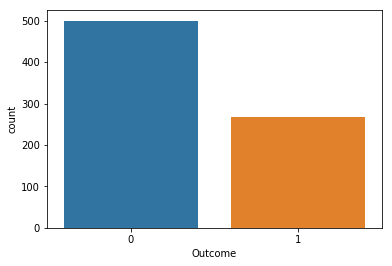

In [13]:
sns.countplot(x='Outcome', data=pima_df)

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


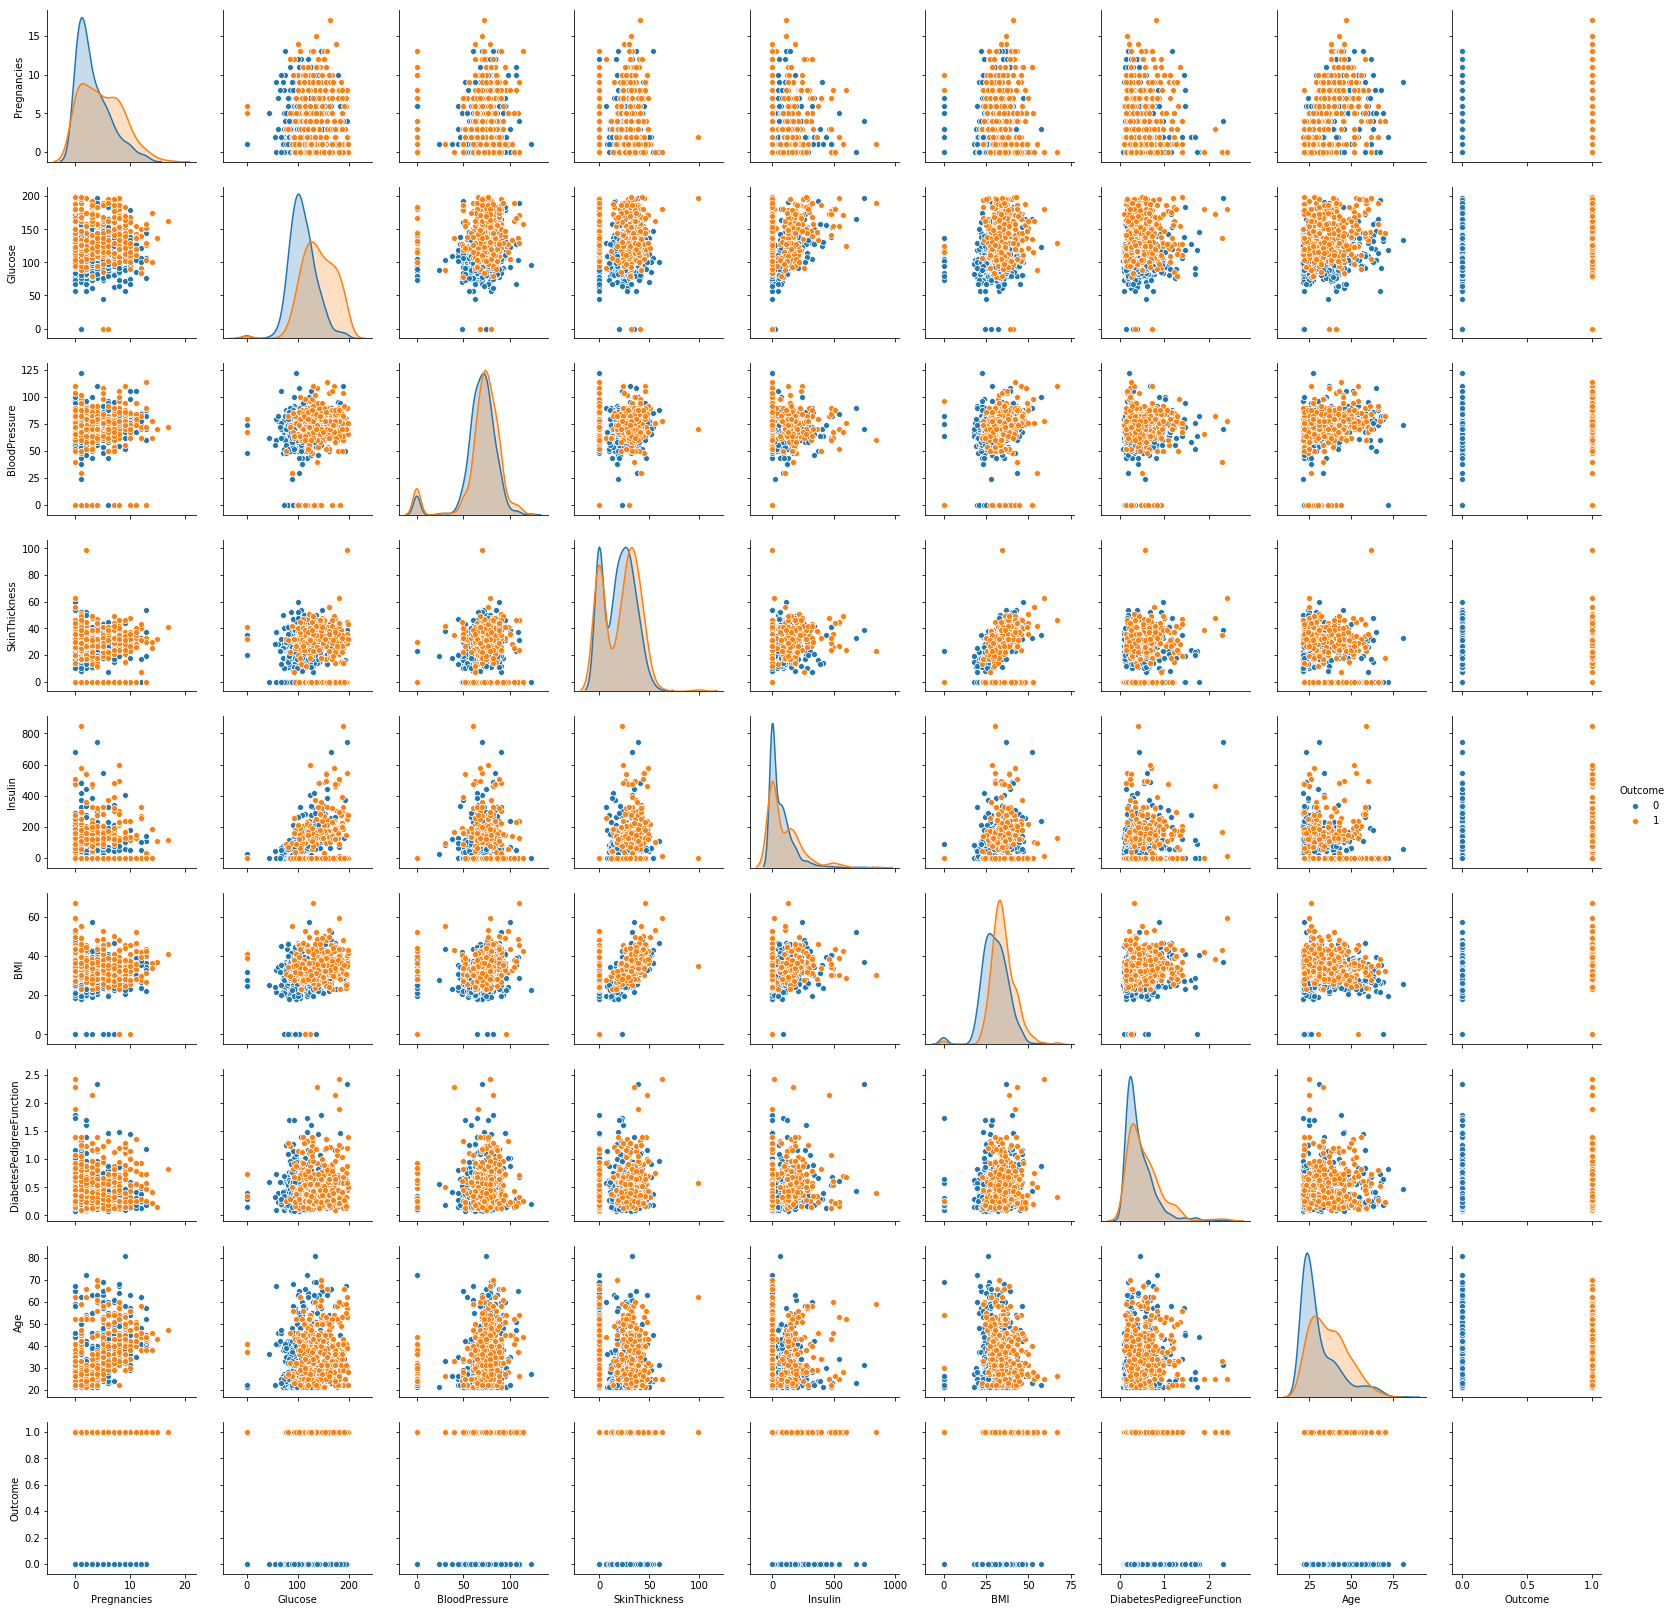

In [14]:
#pima_df_attr = pima_df.iloc[:, 0:7]
sns.pairplot(pima_df,hue='Outcome')   # to plot

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [23]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']
X = pima_df[feature_cols] # Features
y = pima_df.Outcome # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [24]:
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7272727272727273


In [18]:
print(metrics.confusion_matrix(y_test, y_pred))

[[115  31]
 [ 30  55]]


Print the feature importance of the decision model - Optional

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [28]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

rfc_predict = clf.predict(X_test)
rfc_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))

Accuracy: 0.7272727272727273


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.